In [ ]:
# 협업필터링 : 
# user behavior에 기반하여 추천알고리즘을 구현 - user(row), item(col) matrix, value는 rating score
# 특정한 사용자를 기반으로 추천
# 나와 친구에게 물어본다 -  나와 취향이 유사한 이웃에게 물어봐야

# 1. 최근접 이웃 기반 - 
#  -  사용자 기반 
#         - 특정 사용자와 비슷한 고객들을 기반으로 비슷한 고객들이 선호하는 다른 상품을 추천
#         - 특정 사용자와 비슷한 상품을 구매해온 고객들은 비슷한 고객으로 간주
#         - row vector간의 유사도 계산
#         - 당신과 비슷한 고객들이 다음 상품도 구매했습니다..
#  -  아이템 기반
#         - 특정 상품과 유사한 좋은 평가를 받은 다른 비슷한 상품을 추천
#         - 사용자들로부터 특정 상품과 비슷한 평가를 받은 상품들은 비슷한 상품으로 간주
#         - column vector간의 유사도 계산
#         - 이 상품을 선택한 다른 고객들은 다음 상품도 구매했습니다..
#         - 아이템 기반을 많이 사용한다.. - 정확도가 높다
#         -  유사도에 따른 평점 부여 : sigma(아이템유사도벡터*아이템평점벡터)/sigma(유사도)

#           - 순서
#           -  사용자-아이템 행렬 데이터를 아이템-사용자 행렬 데이터로 변환
#           - 아이템 간의 코사인 유사도로 아이템 유사도 산출
#           - 사용자가 구매하지 않은 아이템들 중에서 아이템간 유사도를 반영한 예측점수 계산
#           - 예측점수가 가장 높은 순으로 아이템 추천


In [ ]:
# 구글 : 'Grouplens movielens dataset'

In [ ]:
import pandas as pd
import numpy as np

movies = pd.read_csv('./archive/movie.csv', nrows=9724)
print(movies.shape)
movies.head()


(9724, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings = pd.read_csv('./archive/rating.csv', nrows=100836)
print(ratings.shape)
ratings.head()

(100836, 4)


,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [ ]:
# import pandas as pd
# import numpy as np

# movies = pd.read_csv('./ml-latest-small/movies.csv')
# ratings = pd.read_csv('./ml-latest-small/ratings.csv')
# print(movies.shape)
# print(ratings.shape)

In [ ]:
# movies.head()

In [ ]:
# ratings.head()

In [ ]:
ratings = ratings[['userId', 'movieId', 'rating']]
ratings_matrix = ratings.pivot_table('rating', index='userId', columns='movieId')
ratings_matrix.head(3)


movieId,1,2,3,4,5,6,7,8,9,10,...,117511,117590,118354,118696,118900,118997,119141,125916,128488,128594
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# title 컬럼을 얻기 이해 movies 와 조인 수행
rating_movies = pd.merge(ratings, movies, on='movieId')
rating_movies.head()

,userId,movieId,rating,title,genres
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,Jumanji (1995),Adventure|Children|Fantasy


In [ ]:
# columns='title' 로 title 컬럼으로 pivot 수행. 
ratings_matrix = rating_movies.pivot_table('rating', index='userId', columns='title')
ratings_matrix.head()

title,'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),*batteries not included (1987),...And Justice for All (1979),1-900 (06) (1994),10 (1979),10 Things I Hate About You (1999),100 Girls (2000),...,Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),Zeus and Roxanne (1997),Ziggy Stardust and the Spiders from Mars (1973),Zoolander (2001),"Zorro, the Gay Blade (1981)",Zulu (1964),Zus & Zo (2001),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# NaN 값을 모두 0 으로 변환 - 희소행렬
ratings_matrix = ratings_matrix.fillna(0)
ratings_matrix.head(3)

title,'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),*batteries not included (1987),...And Justice for All (1979),1-900 (06) (1994),10 (1979),10 Things I Hate About You (1999),100 Girls (2000),...,Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),Zeus and Roxanne (1997),Ziggy Stardust and the Spiders from Mars (1973),Zoolander (2001),"Zorro, the Gay Blade (1981)",Zulu (1964),Zus & Zo (2001),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 영화와 영화들 간 유사도 산출

    - 순서
               -  사용자-아이템 행렬 데이터를 아이템-사용자 행렬 데이터로 변환
               - 아이템 간의 코사인 유사도로 아이템 유사도 산출
               - 사용자가 구매하지 않은 아이템들 중에서 아이템간 유사도를 반영한 예측점수 계산
               - 예측점수가 가장 높은 순으로 아이템 추천 

In [ ]:
ratings_matrix_T = ratings_matrix.transpose()
ratings_matrix_T.head(3)

userId,1,2,3,4,5,6,7,8,9,10,...,697,698,699,700,701,702,703,704,705,706
title,,,,,,,,,,,,,,,,,,,,,
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"'burbs, The (1989)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.5,0.0,3.0,0.0,0.0,0.0,0.0


In [ ]:
ratings_matrix_T.shape

(6033, 706)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

item_sim = cosine_similarity(ratings_matrix_T, ratings_matrix_T)

# cosine_similarity() 로 반환된 넘파이 행렬을 영화명을 매핑하여 DataFrame으로 변환
item_sim_df = pd.DataFrame(data=item_sim, index=ratings_matrix.columns,
                          columns=ratings_matrix.columns)
print(item_sim_df.shape)
item_sim_df.head(3)


(6033, 6033)


title,'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),*batteries not included (1987),...And Justice for All (1979),1-900 (06) (1994),10 (1979),10 Things I Hate About You (1999),100 Girls (2000),...,Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),Zeus and Roxanne (1997),Ziggy Stardust and the Spiders from Mars (1973),Zoolander (2001),"Zorro, the Gay Blade (1981)",Zulu (1964),Zus & Zo (2001),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
title,,,,,,,,,,,,,,,,,,,,,
'Round Midnight (1986),1.00000,0.00000,0.15261,0.492366,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
'Til There Was You (1997),0.00000,1.00000,0.16656,0.000000,0.195713,0.272587,0.0,0.000000,0.084340,0.0,...,0.0,0.727607,0.0,0.000000,0.727607,0.260432,0.0,0.240298,0.117931,0.000000
"'burbs, The (1989)",0.15261,0.16656,1.00000,0.075140,0.061574,0.271571,0.0,0.079698,0.160866,0.0,...,0.0,0.228914,0.0,0.084723,0.228914,0.081935,0.0,0.081001,0.000000,0.159746


In [ ]:
item_sim_df["Godfather, The (1972)"].sort_values(ascending=False)[:6]

title
Godfather, The (1972)                                                             1.000000
Godfather: Part II, The (1974)                                                    0.790856
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.594407
Goodfellas (1990)                                                                 0.579041
One Flew Over the Cuckoo's Nest (1975)                                            0.572015
Star Wars: Episode V - The Empire Strikes Back (1980)                             0.553038
Name: Godfather, The (1972), dtype: float64

In [ ]:
item_sim_df["100 Girls (2000)"].sort_values(ascending=False)[1:6]

title
Bangkok Dangerous (2000)                                                       0.948163
Electric Dreams (1984)                                                         0.674579
Street Fighter II: The Animated Movie (Sutorîto Faitâ II gekijô-ban) (1994)    0.674579
Agent Cody Banks 2: Destination London (2004)                                  0.674579
Welcome to Woop-Woop (1997)                                                    0.674579
Name: 100 Girls (2000), dtype: float64

### 아이템 기반 인접 이웃 협업 필터링으로 개인화된 영화 추천

In [ ]:
# 유저에 대한 특정 아이템 추천 평점
# 특정 아이템과 유사도가 큰 아이템 n 개 선별
# 특정 아이템의 평점을 구해서 유사도와 곱하고 합을 구한다
# 유사도와 평점이 높으면 추천지수가 높아진다.
# 유사도와 평점이 모두 낮으면 추천지수가 낮아진다..

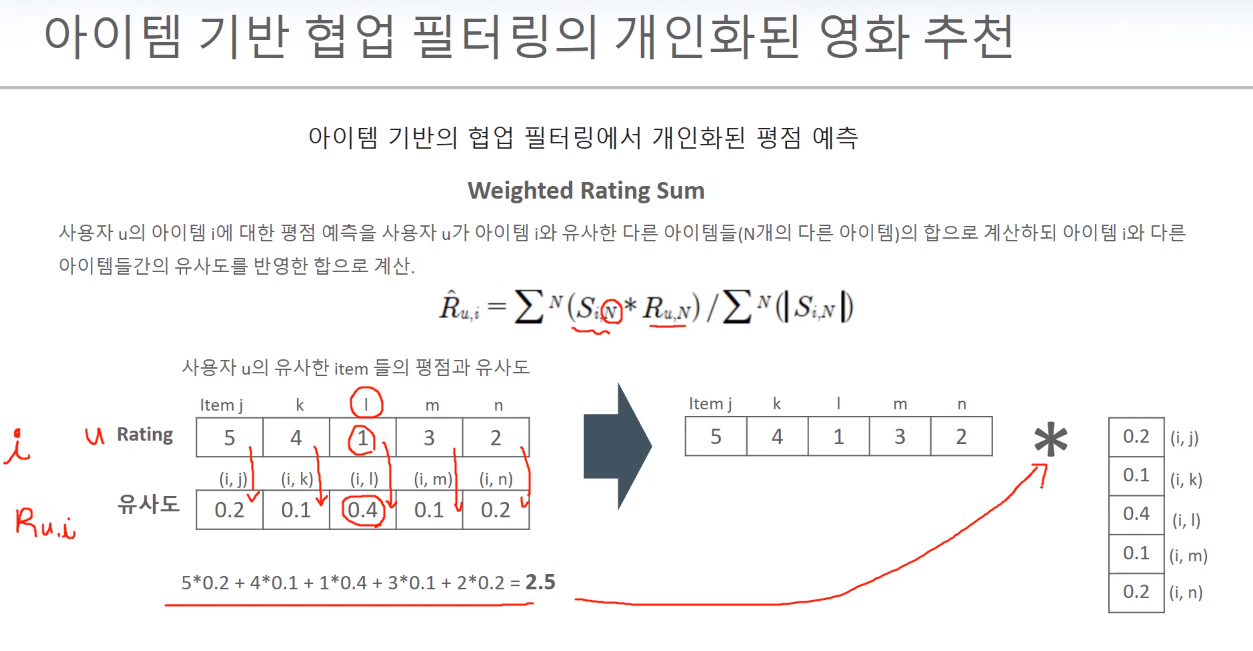

In [ ]:
from IPython.display import Image
Image("아이템기반_인접이웃_협업필터링_개인화영화추천.png")

# 유저의 각 영화에 대한 평점과 특정 영화와 각 영화와의 유사도를 내적한다.
# 유저에 대한 특정 영화의 추천지수..

In [ ]:
def predict_rating(ratings_arr, item_sim_arr ):
    ratings_pred = ratings_arr.dot(item_sim_arr)/ np.array([np.abs(item_sim_arr).sum(axis=1)])
    return ratings_pred


In [ ]:
ratings_matrix.head()


title,'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),*batteries not included (1987),...And Justice for All (1979),1-900 (06) (1994),10 (1979),10 Things I Hate About You (1999),100 Girls (2000),...,Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),Zeus and Roxanne (1997),Ziggy Stardust and the Spiders from Mars (1973),Zoolander (2001),"Zorro, the Gay Blade (1981)",Zulu (1964),Zus & Zo (2001),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
item_sim_df.head()

title,'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),*batteries not included (1987),...And Justice for All (1979),1-900 (06) (1994),10 (1979),10 Things I Hate About You (1999),100 Girls (2000),...,Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),Zeus and Roxanne (1997),Ziggy Stardust and the Spiders from Mars (1973),Zoolander (2001),"Zorro, the Gay Blade (1981)",Zulu (1964),Zus & Zo (2001),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
title,,,,,,,,,,,,,,,,,,,,,
'Round Midnight (1986),1.000000,0.000000,0.152610,0.492366,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
'Til There Was You (1997),0.000000,1.000000,0.166560,0.000000,0.195713,0.272587,0.0,0.000000,0.084340,0.000000,...,0.0,0.727607,0.0,0.000000,0.727607,0.260432,0.0,0.240298,0.117931,0.000000
"'burbs, The (1989)",0.152610,0.166560,1.000000,0.075140,0.061574,0.271571,0.0,0.079698,0.160866,0.000000,...,0.0,0.228914,0.0,0.084723,0.228914,0.081935,0.0,0.081001,0.000000,0.159746
'night Mother (1986),0.492366,0.000000,0.075140,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
*batteries not included (1987),0.000000,0.195713,0.061574,0.000000,1.000000,0.000000,0.0,0.000000,0.358280,0.388821,...,0.0,0.000000,0.0,0.061685,0.000000,0.206307,0.0,0.193077,0.098092,0.000000


In [ ]:
# 유저의 평점매트릭스와 특정 영화와 각 영화의 유사도 매트릭스를 곱해서 유저별, 영화별 추천지수 매트릭스를 구한다..
# 유저에 대한 각 영화의 추천 점수를 구한다..

ratings_pred = predict_rating(ratings_matrix.values , item_sim_df.values)
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index= ratings_matrix.index,
                                   columns = ratings_matrix.columns)
ratings_pred_matrix.head(3)

title,'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),*batteries not included (1987),...And Justice for All (1979),1-900 (06) (1994),10 (1979),10 Things I Hate About You (1999),100 Girls (2000),...,Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),Zeus and Roxanne (1997),Ziggy Stardust and the Spiders from Mars (1973),Zoolander (2001),"Zorro, the Gay Blade (1981)",Zulu (1964),Zus & Zo (2001),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.00000,0.075408,0.154626,0.236055,0.291536,0.123105,0.140093,0.176202,0.220507,0.336039,...,0.209723,0.066496,0.270029,0.241554,0.066496,0.123433,0.140093,0.168147,0.236960,0.198440
2,0.15182,0.039932,0.060164,0.076154,0.095113,0.051632,0.047374,0.057792,0.074455,0.110735,...,0.046750,0.036881,0.060099,0.069376,0.036881,0.044814,0.047374,0.063067,0.075292,0.071185
3,0.42810,0.113603,0.213403,0.453555,0.352870,0.164228,0.142009,0.257441,0.276917,0.352426,...,0.241063,0.096178,0.230042,0.260476,0.096178,0.150496,0.142009,0.213306,0.253907,0.299268


In [ ]:
ratings_pred_matrix.shape

(706, 6033)

In [ ]:
from sklearn.metrics import mean_squared_error

# 사용자가 평점을 부여한 영화(칼럼)에 대해서만 예측 성능 평가 MSE 를 구함. - 평점이 0이 아닌

def get_mse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

# 실제로 예측했던 영화에 대해서 예측점수와 실제 평점과 mse
print('아이템 기반 모든 인접 이웃 MSE: ', get_mse(ratings_pred, ratings_matrix.values ))


아이템 기반 모든 인접 이웃 MSE:  10.05406653441436


In [ ]:
# 추천지수 상위 n개에 대한 추천지수 매트릭스

def predict_rating_topsim(ratings_arr, item_sim_arr, n=20):
    # 사용자-아이템 평점 행렬 크기만큼 0으로 채운 예측 행렬 초기화 - 나중에 mse계산에서 제외된다.
    pred = np.zeros(ratings_arr.shape)

    # 사용자-아이템 평점 행렬의 열 크기만큼 Loop 수행. 
    for col in range(ratings_arr.shape[1]):
        # 유사도 행렬에서 유사도가 큰 순으로 n개 데이터 행렬의 index 반환
        top_n_items = [np.argsort(item_sim_arr[:, col])[:-n-1:-1]]
        # 개인화된 예측 평점을 계산
        for row in range(ratings_arr.shape[0]):
            # 특정 cell에 값을 채운다.
            # item_sim_arr[col, :][top_n_items] - 특정 영화 유사도
            # ratings_arr[row, :][top_n_items] - 특정 영화 평점
            pred[row, col] = item_sim_arr[col, :][top_n_items].dot(ratings_arr[row, :][top_n_items].T)  # fancy indexing
            pred[row, col] /= np.sum(np.abs(item_sim_arr[col, :][top_n_items]))        
    return pred


In [ ]:
ratings_pred = predict_rating_topsim(ratings_matrix.values , item_sim_df.values, n=20)
ratings_pred

# 상위 n개 이외는 0으로 채워져 있어서 mse계산에서 제외된다..

D:\program\anaconda\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]
D:\program\anaconda\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


array([[0.        , 0.        , 0.        , ..., 0.16448615, 0.1954917 ,
        0.32270705],
       [0.15182008, 0.        , 0.        , ..., 0.22559266, 0.        ,
        0.        ],
       [0.4280996 , 0.        , 0.        , ..., 0.54455216, 0.        ,
        0.22053238],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
ratings_pred.shape

(706, 6033)

In [ ]:
print('아이템 기반 인접 TOP-20 이웃 MSE: ', get_mse(ratings_pred, ratings_matrix.values ))

아이템 기반 인접 TOP-20 이웃 MSE:  3.9985589377556545


In [ ]:
# 계산된 예측 평점 데이터는 DataFrame으로 재생성
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index= ratings_matrix.index,
                                   columns = ratings_matrix.columns)
ratings_pred_matrix.head()

title,'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),*batteries not included (1987),...And Justice for All (1979),1-900 (06) (1994),10 (1979),10 Things I Hate About You (1999),100 Girls (2000),...,Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),Zeus and Roxanne (1997),Ziggy Stardust and the Spiders from Mars (1973),Zoolander (2001),"Zorro, the Gay Blade (1981)",Zulu (1964),Zus & Zo (2001),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.684634,0.0,...,0.0,0.0,0.0,0.134779,0.0,0.0,0.0,0.164486,0.195492,0.322707
2,0.15182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.257833,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.225593,0.000000,0.000000
3,0.42810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.131011,0.0,...,0.0,0.0,0.0,0.177170,0.0,0.0,0.0,0.544552,0.000000,0.220532
4,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
5,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [ ]:
# user_id 가 9인 사용자에 대한 영화추천

user_rating_id = ratings_matrix.loc[9, :]
user_rating_id[ user_rating_id > 0].sort_values(ascending=False)[:10]

title
What Lies Beneath (2000)               5.0
Hannibal (2001)                        5.0
Exorcist, The (1973)                   5.0
Fight Club (1999)                      5.0
Godfather, The (1972)                  5.0
American Pie (1999)                    4.0
Stir of Echoes (1999)                  4.0
Cast Away (2000)                       4.0
Fast and the Furious, The (2001)       4.0
There's Something About Mary (1998)    4.0
Name: 9, dtype: float64

In [ ]:
# 사용자가 이전에 영화평점을 주지 않은 영화에 대해 추천..

def get_unseen_movies(ratings_matrix, userId):
    # userId로 입력받은 사용자의 모든 영화정보 추출하여 Series로 반환함. 
    # 반환된 user_rating 은 영화명(title)을 index로 가지는 Series 객체임. 
    user_rating = ratings_matrix.loc[userId,:]
    
    # user_rating이 0보다 크면 기존에 관람한 영화임. 대상 index를 추출하여 list 객체로 만듬
    already_seen = user_rating[ user_rating > 0].index.tolist()
    
    # 모든 영화명을 list 객체로 만듬. 
    movies_list = ratings_matrix.columns.tolist()
    
    # list comprehension으로 already_seen에 해당하는 movie는 movies_list에서 제외함. 
    unseen_list = [ movie for movie in movies_list if movie not in already_seen]
    
    return unseen_list


In [ ]:
def recomm_movie_by_userid(pred_df, userId, unseen_list, top_n=10):
    # 예측 평점 DataFrame에서 사용자id index와 unseen_list로 들어온 영화명 컬럼을 추출하여
    # 가장 예측 평점이 높은 순으로 정렬함. 
    recomm_movies = pred_df.loc[userId, unseen_list].sort_values(ascending=False)[:top_n]
    return recomm_movies
    

In [ ]:
# 사용자가 관람하지 않는 영화명 추출   
unseen_list = get_unseen_movies(ratings_matrix, 9)
unseen_list

["'Round Midnight (1986)",
 "'Til There Was You (1997)",
 "'burbs, The (1989)",
 "'night Mother (1986)",
 '*batteries not included (1987)',
 '...And Justice for All (1979)',
 '1-900 (06) (1994)',
 '10 (1979)',
 '10 Things I Hate About You (1999)',
 '100 Girls (2000)',
 '101 Dalmatians (1996)',
 '101 Dalmatians (One Hundred and One Dalmatians) (1961)',
 '101 Reykjavik (101 Reykjavík) (2000)',
 '102 Dalmatians (2000)',
 '11:14 (2003)',
 '12 Angry Men (1957)',
 '13 Ghosts (1960)',
 '13 Going on 30 (2004)',
 '13 Rue Madeleine (1947)',
 '13th Warrior, The (1999)',
 '15 Minutes (2001)',
 '1776 (1972)',
 '18 Again! (1988)',
 '187 (One Eight Seven) (1997)',
 '1900 (Novecento) (1976)',
 '1941 (1979)',
 '1969 (1988)',
 '1984 (Nineteen Eighty-Four) (1984)',
 '2 Days in the Valley (1996)',
 '2 Fast 2 Furious (Fast and the Furious 2, The) (2003)',
 "2 ou 3 choses que je sais d'elle (2 or 3 Things I Know About Her) (1967)",
 '20 Dates (1998)',
 '20,000 Leagues Under the Sea (1954)',
 '200 Cigarettes

In [ ]:
# 아이템 기반의 인접 이웃 협업 필터링으로 영화 추천 
recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 9, unseen_list, top_n=10)
recomm_movies

title
South Park: Bigger, Longer and Uncut (1999)           0.913022
Austin Powers: International Man of Mystery (1997)    0.822709
Big Daddy (1999)                                      0.811532
Me, Myself & Irene (2000)                             0.785744
Cell, The (2000)                                      0.743267
Shawshank Redemption, The (1994)                      0.666384
Blow (2001)                                           0.634795
Office Space (1999)                                   0.630728
Jaws (1975)                                           0.613238
Dogma (1999)                                          0.608781
Name: 9, dtype: float64

In [ ]:
# 평점 데이타를 DataFrame으로 생성. 
recomm_movies = pd.DataFrame(data=recomm_movies.values,index=recomm_movies.index,columns=['pred_score'])
recomm_movies

,pred_score
title,
"South Park: Bigger, Longer and Uncut (1999)",0.913022
Austin Powers: International Man of Mystery (1997),0.822709
Big Daddy (1999),0.811532
"Me, Myself & Irene (2000)",0.785744
"Cell, The (2000)",0.743267
"Shawshank Redemption, The (1994)",0.666384
Blow (2001),0.634795
Office Space (1999),0.630728
Jaws (1975),0.613238
